In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
# Task 1.1 - Perform image compression using JPEG
def compress_image_jpeg(image_path, quality=50):
    img = cv2.imread(image_path)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, compressed_img = cv2.imencode('.jpg', img, encode_param)
    decompressed_img = cv2.imdecode(compressed_img, cv2.IMREAD_COLOR)
    return img, decompressed_img

In [3]:
# Task 1.2 - Perform image compression using PNG
def compress_image_png(image_path, compression=9):
    img = cv2.imread(image_path)
    encode_param = [int(cv2.IMWRITE_PNG_COMPRESSION), compression]
    _, compressed_img = cv2.imencode('.png', img, encode_param)
    decompressed_img = cv2.imdecode(compressed_img, cv2.IMREAD_COLOR)
    return img, decompressed_img

In [4]:
# Display function
def show_images(original, compressed, title):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title)
    axs[1].axis('off')
    plt.show()

In [5]:
import urllib.request

# Download a sample image
image_url = "https://upload.wikimedia.org/wikipedia/commons/9/97/The_Earth_seen_from_Apollo_17.jpg"
image_path = "sample_image.jpg"

urllib.request.urlretrieve(image_url, image_path)

print("Sample image downloaded as", image_path)


Sample image downloaded as sample_image.jpg


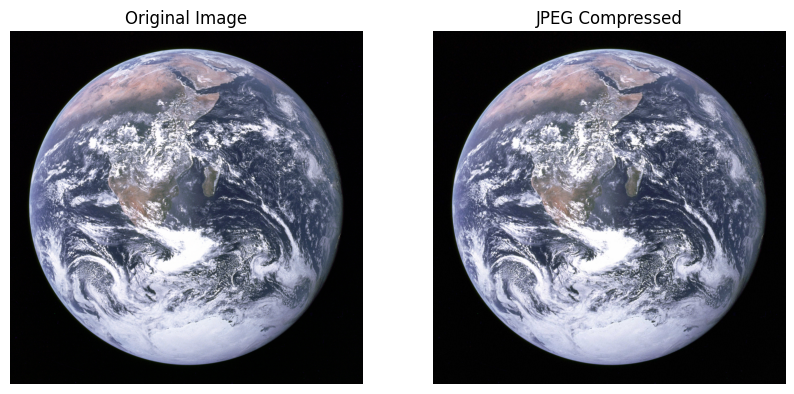

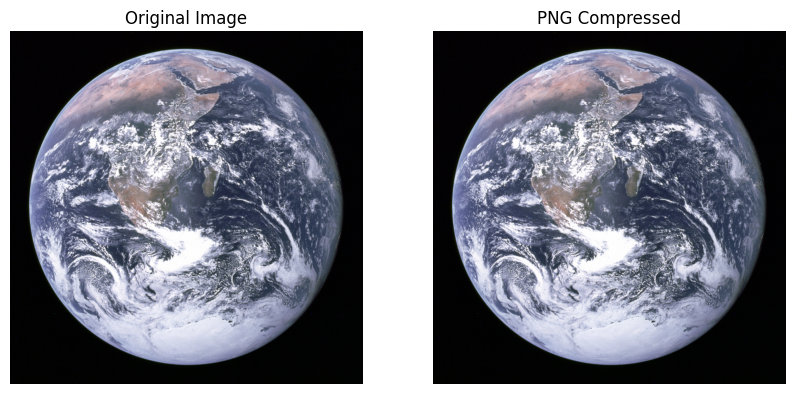

In [6]:
# Provide an image path and run compression
image_path = 'sample_image.jpg'  # Change this to your image path
orig, compressed_jpeg = compress_image_jpeg(image_path)
show_images(orig, compressed_jpeg, 'JPEG Compressed')

orig, compressed_png = compress_image_png(image_path)
show_images(orig, compressed_png, 'PNG Compressed')

In [7]:
# Task 2.1 - Apply CNN on MNIST dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = keras.datasets.mnist.load_data()
mnist_train_images = mnist_train_images.reshape(-1, 28, 28, 1) / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28, 28, 1) / 255.0
mnist_train_labels = to_categorical(mnist_train_labels, 10)
mnist_test_labels = to_categorical(mnist_test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
mnist_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mnist_model.fit(mnist_train_images, mnist_train_labels, epochs=50, batch_size=64, validation_data=(mnist_test_images, mnist_test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.8361 - loss: 0.5310 - val_accuracy: 0.9757 - val_loss: 0.0796
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9606 - loss: 0.1269 - val_accuracy: 0.9801 - val_loss: 0.0585
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9720 - loss: 0.0932 - val_accuracy: 0.9837 - val_loss: 0.0492
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.9789 - loss: 0.0713 - val_accuracy: 0.9854 - val_loss: 0.0437
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9808 - loss: 0.0636 - val_accuracy: 0.9850 - val_loss: 0.0434
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.9844 - val_loss: 0.0486
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.9841 - loss: 0.0501 - val_accuracy: 0.9864 - val_loss: 0.0397
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.9867 - loss: 0.0399 - 

In [9]:
# Task 2.2 - Apply CNN on CIFAR-10 dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = keras.datasets.cifar10.load_data()
cifar_train_images, cifar_test_images = cifar_train_images / 255.0, cifar_test_images / 255.0
cifar_train_labels, cifar_test_labels = to_categorical(cifar_train_labels, 10), to_categorical(cifar_test_labels, 10)

cifar_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cifar_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cifar_model.fit(cifar_train_images, cifar_train_labels, epochs=50, batch_size=64, validation_data=(cifar_test_images, cifar_test_labels))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.2861 - loss: 1.9325 - val_accuracy: 0.5058 - val_loss: 1.4489
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 52ms/step - accuracy: 0.4488 - loss: 1.5282 - val_accuracy: 0.5496 - val_loss: 1.2953
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.4840 - loss: 1.4252 - val_accuracy: 0.5614 - val_loss: 1.2459
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.5034 - loss: 1.3671 - val_accuracy: 0.5884 - val_loss: 1.1752
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.5283 - loss: 1.3000 - val_accuracy: 0.5986 - val_loss: 1.1645
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.5378 - loss: 1.2752 - val_accuracy: 0.6089 - val_loss: 1.1164
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.5506 - loss: 1.2328 - val_accuracy: 0.6130 - val_loss: 1.1002
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━

In [10]:
# Evaluate on test data
cifar_predictions = np.argmax(cifar_model.predict(cifar_test_images), axis=1)
cifar_true_labels = np.argmax(cifar_test_labels, axis=1)
print(classification_report(cifar_true_labels, cifar_predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1000
           1       0.71      0.76      0.74      1000
           2       0.54      0.48      0.51      1000
           3       0.43      0.48      0.45      1000
           4       0.61      0.55      0.58      1000
           5       0.53      0.55      0.54      1000
           6       0.79      0.64      0.71      1000
           7       0.70      0.72      0.71      1000
           8       0.77      0.75      0.76      1000
           9       0.65      0.74      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

